In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('hyundi.csv')
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0      I20  2017   7999       Manual    17307   Petrol  145  58.9         1.2
1   Tucson  2016  14499    Automatic    25233   Diesel  235  43.5         2.0
2   Tucson  2016  11399       Manual    37877   Diesel   30  61.7         1.7
3      I10  2016   6499       Manual    23789   Petrol   20  60.1         1.0
4     IX35  2015  10199       Manual    33177   Diesel  160  51.4         2.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax           4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

**Check outliers in the price variable**

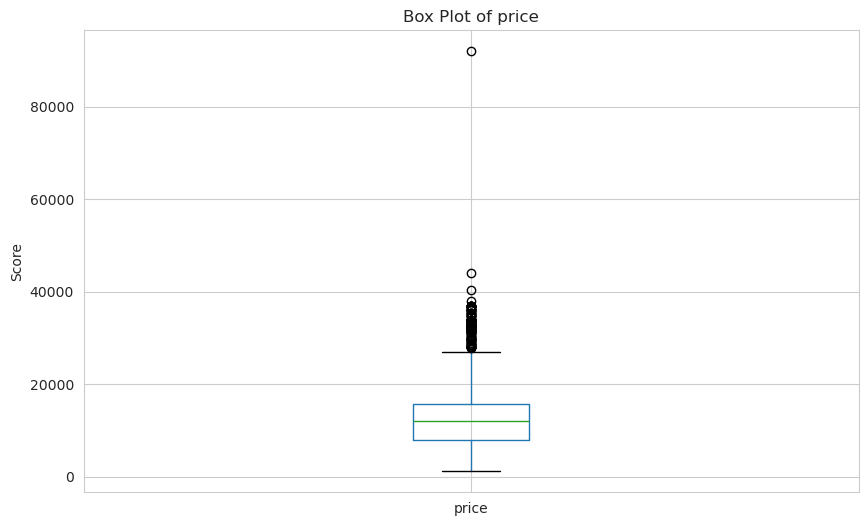

In [6]:
import matplotlib.pyplot as plt
# Selecting the required columns for the box plot
columns_to_plot = ['price']

# Creating the box plot
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title('Box Plot of price')
plt.ylabel('Score')
plt.show()

There is an obvious outlier and it will be treated by capping.

In [7]:
# Calculate the interquartile range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

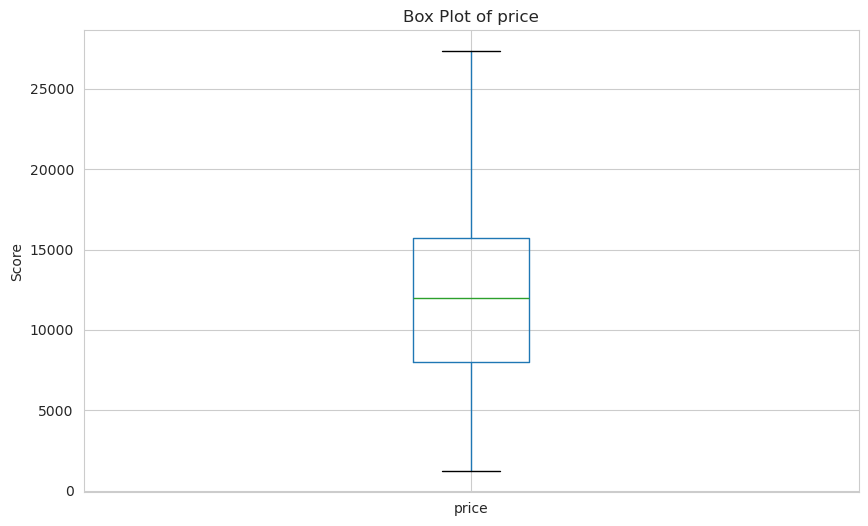

In [8]:
# Selecting the required columns for the box plot
columns_to_plot = ['price']

# Creating the box plot
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title('Box Plot of price')
plt.ylabel('Score')
plt.show()

In [26]:
df.to_csv('hyundi_processed.csv', index=False)


## Model Training

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,cross_validate

In [10]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [11]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [12]:
predictor = TabularPredictor(label="price", problem_type = 'regression', eval_metric = 'mean_squared_error').fit(train_data = X_train, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250420_053251/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20250420_053251/"
AutoGluon Version:  0.8.3
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Mar 25 21:34:29 UTC 2025
Disk Space Avail:   27.93 GB / 53.68 GB (52.0%)
Train Data Rows:    3888
Train Data Columns: 8
Label Column: price
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    29037.2 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTyp

In [13]:
predictor.leaderboard()

                     model     score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -1.207766e+06       3.583683  103.048444                0.000788           0.499308            3       True         22
1      WeightedEnsemble_L2 -1.220910e+06       2.429252   62.669473                0.000737           0.587838            2       True         12
2     ExtraTreesMSE_BAG_L2 -1.226863e+06       3.153001   66.360514                0.241807           0.963080            2       True         17
3   NeuralNetFastAI_BAG_L2 -1.260368e+06       3.090409   75.363020                0.179215           9.965585            2       True         18
4          CatBoost_BAG_L2 -1.264873e+06       2.950426   76.105852                0.039232          10.708417            2       True         16
5          CatBoost_BAG_L1 -1.272542e+06       0.066470   19.612334                0.066470          19.612334            1 

model     score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3 -1.207766e+06       3.583683  103.048444   
1      WeightedEnsemble_L2 -1.220910e+06       2.429252   62.669473   
2     ExtraTreesMSE_BAG_L2 -1.226863e+06       3.153001   66.360514   
3   NeuralNetFastAI_BAG_L2 -1.260368e+06       3.090409   75.363020   
4          CatBoost_BAG_L2 -1.264873e+06       2.950426   76.105852   
5          CatBoost_BAG_L1 -1.272542e+06       0.066470   19.612334   
6   RandomForestMSE_BAG_L2 -1.276733e+06       3.156093   68.755284   
7           XGBoost_BAG_L2 -1.287031e+06       2.992853   68.743254   
8          LightGBM_BAG_L2 -1.298672e+06       2.973678   67.549356   
9        LightGBMXT_BAG_L2 -1.313538e+06       3.020882   67.493851   
10   NeuralNetTorch_BAG_L2 -1.318462e+06       3.040980   77.566232   
11          XGBoost_BAG_L1 -1.342201e+06       0.094617    1.928471   
12       LightGBMXT_BAG_L1 -1.347573e+06       1.617189    5.147197   
13    LightGBMLarge_BAG_L2 -1.358484e+06       3.009885   69.780981   
14    LightGBMLarge_BAG_L1 -1.361562e+06       0.125511    2.273126   
15         LightGBM_BAG_L1 -1.377691e+06       0.214751    2.062578   
16    ExtraTreesMSE_BAG_L1 -1.416836e+06       0.231321    0.602402   
17  NeuralNetFastAI_BAG_L1 -1.438245e+06       0.154442   10.103794   
18   NeuralNetTorch_BAG_L1 -1.450594e+06       0.138964   22.414311   
19  RandomForestMSE_BAG_L1 -1.550446e+06       0.239471    1.241506   
20   KNeighborsDist_BAG_L1 -2.189638e+07       0.013596    0.005315   
21   KNeighborsUnif_BAG_L1 -2.298926e+07       0.014861    0.006401   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000788           0.499308            3       True   
1                 0.000737           0.587838            2       True   
2                 0.241807           0.963080            2       True   
3                 0.179215           9.965585            2       True   
4                 0.039232          10.708417            2       True   
5                 0.066470          19.612334            1       True   
6                 0.244899           3.357849            2       True   
7                 0.081660           3.345820            2       True   
8                 0.062484           2.151922            2       True   
9                 0.109689           2.096417            2       True   
10                0.129786          12.168798            2       True   
11                0.094617           1.928471            1       True   
12                1.617189           5.147197            1       True   
13                0.098691           4.383547            2       True   
14                0.125511           2.273126            1       True   
15                0.214751           2.062578            1       True   
16                0.231321           0.602402            1       True   
17                0.154442          10.103794            1       True   
18                0.138964          22.414311            1       True   
19                0.239471           1.241506            1       True   
20                0.013596           0.005315            1       True   
21                0.014861           0.006401            1       True   

    fit_order  
0          22  
1          12  
2          17  
3          18  
4          16  
5           6  
6          15  
7          19  
8          14  
9          13  
10         20  
11          9  
12          3  
13         21  
14         11  
15          4  
16          7  
17          8  
18         10  
19          5  
20          2  
21          1

In [14]:
leaderboard = predictor.leaderboard(silent=True)

In [15]:
model = leaderboard.iloc[0]['model']
print(f"The best model is: {model}")

The best model is: WeightedEnsemble_L3


In [16]:
predictor.evaluate(X_test)

Evaluation: mean_squared_error on test data: -1124331.2241861902
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_squared_error": -1124331.2241861902,
    "root_mean_squared_error": -1060.3448609703307,
    "mean_absolute_error": -701.4053558224023,
    "r2": 0.9603534669665886,
    "pearsonr": 0.9800275607905,
    "median_absolute_error": -482.83740234375
}


{'mean_squared_error': -1124331.2241861902,
 'root_mean_squared_error': -1060.3448609703307,
 'mean_absolute_error': -701.4053558224023,
 'r2': 0.9603534669665886,
 'pearsonr': 0.9800275607905,
 'median_absolute_error': -482.83740234375}

**Model Evaluation**

In [18]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    make_scorer
)

In [19]:
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [20]:
pred = predictor.predict(X_test)

In [21]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred)))
print('R-squared: ',r2_score(y_test,pred))

MAE: 607.3046234507619
MSE: 799928.6206895049
RMSE: 894.3872878622017
R-squared:  0.9721305888975899


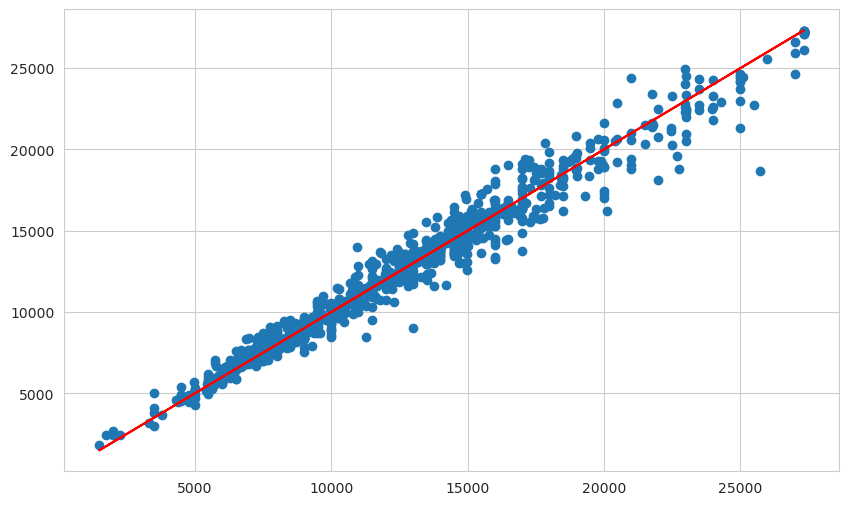

In [22]:
# Our predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

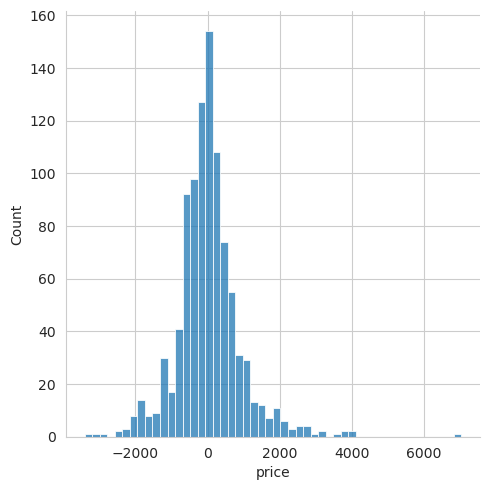

In [23]:
sns.set_style('whitegrid')
sns.displot((y_test-pred),bins=50) # plot a residual histogram by passing the y_test-predictions

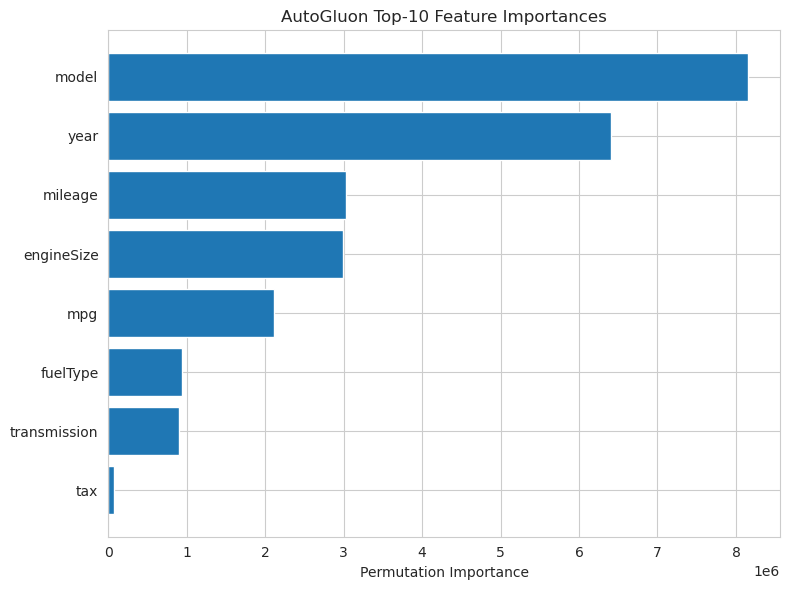

In [25]:
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt

X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

# Use full hold‑out set (no subsampling)
imp_df = predictor.feature_importance(
    data=X_test,
    feature_stage='original',
    subsample_size=None,   # None → use all rows
    silent=True
)

# Plot top 10
top10 = imp_df.sort_values('importance', ascending=False).head(10)
plt.figure(figsize=(8, 6))
plt.barh(top10.index, top10['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Permutation Importance')
plt.title('AutoGluon Top‑10 Feature Importances')
plt.tight_layout()
plt.show()
